# Manipulating DataFrames with Pandas - 2 (Grouping Data)

We can use `groupby()` function to
* Split data into groups
* Apply a function to each group
  - Aggregate (e.g. compute counts, means)
  - Transform (e.g. fill NAs within groups with group specific values)
  - Filter (filter out data based on a group statistic)
* Combine the results

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

We'll use _Gapminder_ dataset in this Notebook.

In [89]:
df = pd.read_csv('data/gapminder.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10111 entries, 0 to 10110
Data columns (total 8 columns):
Country            10111 non-null object
Year               10111 non-null int64
fertility          10100 non-null float64
life               10111 non-null float64
population         10108 non-null float64
child_mortality    9210 non-null float64
gdp                9000 non-null float64
region             10111 non-null object
dtypes: float64(5), int64(1), object(2)
memory usage: 632.0+ KB


In [90]:
df.shape

(10111, 8)

In [91]:
df.head(1)

,Country,Year,fertility,life,population,child_mortality,gdp,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,South Asia


## Splitting Data

We can split the data into groups with `.groupby()`. This allows us to implement functions to each group seperately

In [105]:
df_group = df.groupby('region')
df_group.head(1)

,Country,Year,fertility,life,population,child_mortality,gdp,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.70,1182.0,South Asia
50,Albania,1964,5.711,65.475,1817098.0,122.67,3023.0,Europe & Central Asia
100,Algeria,1964,7.653,47.953,11654905.0,247.30,5693.0,Middle East & North Africa
150,Angola,1964,7.425,34.604,5337063.0,305.20,4573.0,Sub-Saharan Africa
200,Antigua and Barbuda,1964,4.250,63.775,58653.0,72.78,5008.0,America
400,Australia,1964,3.154,70.650,11122567.0,22.70,16098.0,East Asia & Pacific


In [107]:
type(df_group.groups)

dict

In [109]:
df_group.groups.keys()

dict_keys(['America', 'East Asia & Pacific', 'Europe & Central Asia', 'Middle East & North Africa', 'South Asia', 'Sub-Saharan Africa'])

In [110]:
df_group.groups['Europe & Central Asia']

Int64Index([   50,    51,    52,    53,    54,    55,    56,    57,    58,
               59,
            ...
            10101, 10102, 10103, 10104, 10105, 10106, 10107, 10108, 10109,
            10110],
           dtype='int64', length=2560)

## Applying a Function to Each Group

### Aggregation

>Aggregating functions are the ones that reduce the dimension of the returned objects. Some common aggregating functions are tabulated below:
- mean()	Compute mean of groups
- sum()	Compute sum of group values
- size()	Compute group sizes
- count()	Compute count of group
- std()	Standard deviation of groups
- var()	Compute variance of groups
- sem()	Standard error of the mean of groups
- describe()	Generates descriptive statistics
- first()	Compute first of group values
- last()	Compute last of group values
- nth()	Take nth value, or a subset if n is a list
- min()	Compute min of group values
- max()	Compute max of group values.
[source](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [93]:
df.groupby('region').mean()

,Year,fertility,life,population,child_mortality,gdp
region,,,,,,
America,1988.500000,3.486061,68.722251,1.774572e+07,50.513292,11599.921875
East Asia & Pacific,1988.510931,3.725836,66.108632,5.468619e+07,59.337826,13336.156923
Europe & Central Asia,1988.550781,2.214177,71.931303,1.600358e+07,30.180168,18442.045417
Middle East & North Africa,1988.500000,4.970019,65.194301,1.171303e+07,69.884533,27510.731579
South Asia,1988.500000,5.004162,57.137710,1.406782e+08,137.767150,2552.650000
Sub-Saharan Africa,1988.500000,5.956105,51.664426,1.050998e+07,158.917473,3152.428511


In [94]:
df.groupby(['Year', 'region']).mean().head()

fertility       life    population  \
Year region                                                           
1964 America                      5.574650  60.462775  1.155489e+07   
     East Asia & Pacific          5.708032  56.798429  3.470839e+07   
     Europe & Central Asia        3.270488  67.840110  1.370303e+07   
     Middle East & North Africa   6.965571  52.119810  5.623595e+06   
     South Asia                   6.480500  43.877125  7.813424e+07   

                                 child_mortality           gdp  
Year region                                                     
1964 America                          113.950667   6813.875000  
     East Asia & Pacific              129.109130   6431.500000  
     Europe & Central Asia             61.585319   9760.062500  
     Middle East & North Africa       179.605263  10962.157895  
     South Asia                       256.922500   1233.875000

Multiple aggregations can be applied with `.agg()` method.

In [95]:
df.groupby('region')['population'].agg(['max', 'mean'])

,max,mean
region,,
America,3.184976e+08,1.774572e+07
East Asia & Pacific,1.359368e+09,5.468619e+07
Europe & Central Asia,1.489456e+08,1.600358e+07
Middle East & North Africa,8.537844e+07,1.171303e+07
South Asia,1.275138e+09,1.406782e+08
Sub-Saharan Africa,1.709011e+08,1.050998e+07


In [96]:
df_mi = pd.read_csv('data/gapminder.csv', index_col = ['region', 'Year'])
df_mi.head()

Country  fertility    life  population  child_mortality  \
region     Year                                                                
South Asia 1964  Afghanistan      7.671  33.639  10474903.0            339.7   
           1965  Afghanistan      7.671  34.152  10697983.0            334.1   
           1966  Afghanistan      7.671  34.662  10927724.0            328.7   
           1967  Afghanistan      7.671  35.170  11163656.0            323.3   
           1968  Afghanistan      7.671  35.674  11411022.0            318.1   

                    gdp  
region     Year          
South Asia 1964  1182.0  
           1965  1182.0  
           1966  1168.0  
           1967  1173.0  
           1968  1187.0

### Transformation

We can apply a function to groups of data with `.transform()` method. This method allows us perform group-specific computations. The resulting object is indexed as the grouped object, and the sizes are the same.

#### Standardization Example

We can standardize values within a group.

In [97]:
# Create a new Data Frame with only 2010 data
df_2010 = df[df['Year']==2010]

df_2010.groupby('region')['region','life','fertility'].head(1)

,region,life,fertility
46,South Asia,59.612,5.659
96,Europe & Central Asia,76.780,1.741
146,Middle East & North Africa,70.615,2.817
196,Sub-Saharan Africa,50.689,6.218
246,America,75.437,2.130
446,East Asia & Pacific,82.091,1.886


In [98]:
# Import zscore
from scipy.stats import zscore

# Group by region and transform the ['life', 'fertility'] columns using zscore
standardized = df_2010.groupby('region')['life','fertility'].transform(zscore)

In [99]:
# check whether the number of data points are equal
df_2010.shape[0] == standardized.shape[0]

True

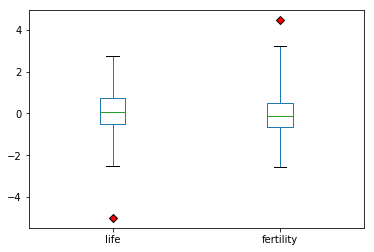

In [100]:
# set whiskers to 3, and mark the outliers in red ('flierprops' specifies the style of the fliers)
standardized.plot(kind='box', whis=3, flierprops=dict(markerfacecolor='r', marker='D'))

In [101]:
# Construct a Boolean Series to identify outliers
outliers = (standardized['life'] < -3) | (standardized['fertility'] > 3)

# Filter data by the outliers
df_outliers = df_2010.loc[outliers]

# Print outliers
df_outliers.head()

,Country,Year,fertility,life,population,child_mortality,gdp,region
3646,Guatemala,2010,3.974,71.100,14388929.0,34.5,6849.0,America
3846,Haiti,2010,3.350,45.000,9993247.0,208.8,1518.0,America
8846,Tajikistan,2010,3.780,66.830,6878637.0,52.6,2110.0,Europe & Central Asia
8996,Timor-Leste,2010,6.237,65.952,1124355.0,63.8,1777.0,East Asia & Pacific


#### Imputation Example

We can use `.groupby()` and `.transform()` to fill missing data for each group. Let's investigate which columns have missing data.

In [102]:
df_2010.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 46 to 10097
Data columns (total 8 columns):
Country            202 non-null object
Year               202 non-null int64
fertility          202 non-null float64
life               202 non-null float64
population         202 non-null float64
child_mortality    189 non-null float64
gdp                180 non-null float64
region             202 non-null object
dtypes: float64(5), int64(1), object(2)
memory usage: 14.2+ KB


In [103]:
# A function that imputes median
def impute_median(series):
    return series.fillna(series.median())

# Data is grouped and NA's in the child_mortality column are filled with median of the each region
df_2010['child_mortality'] = df_2010.groupby('region')['child_mortality'].transform(impute_median)
df_2010.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 46 to 10097
Data columns (total 8 columns):
Country            202 non-null object
Year               202 non-null int64
fertility          202 non-null float64
life               202 non-null float64
population         202 non-null float64
child_mortality    202 non-null float64
gdp                180 non-null float64
region             202 non-null object
dtypes: float64(5), int64(1), object(2)
memory usage: 14.2+ KB


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Tranformation with `.apply()` Method

Lets's analyze economic disparity within regions of the world as an example.

In [104]:
def disparity(gr):
    '''A function to compute the spread of per capita GDP in each region and
    each country's z-score of the regional per capita GDP'''
    
    # Compute the spread of gr['gdp']: s
    s = gr['gdp'].max() - gr['gdp'].min()
    # Compute the z-score of gr['gdp'] as (gr['gdp']-gr['gdp'].mean())/gr['gdp'].std(): z
    z = (gr['gdp'] - gr['gdp'].mean())/gr['gdp'].std()
    # Return a DataFrame with the inputs {'z(gdp)':z, 'regional spread(gdp)':s}
    return pd.DataFrame({'z(gdp)':z , 'regional spread(gdp)':s})

# set the index of df_2010 as Country
df_2010.set_index('Country', inplace=True)

# Group df_2010 by 'region' and apply the disparity function on regions
disp = df_2010.groupby('region').apply(disparity)

# Print the disparity of 'Turkey', 'Germany' and  United States'
disp.loc[['Turkey', 'Germany', 'United States', 'China']]

,z(gdp),regional spread(gdp)
Country,,
Turkey,-0.562563,89037.0
Germany,0.827745,89037.0
United States,3.013374,47855.0
China,-0.432756,96993.0
